Below I am going to show the impact of making an interaction term.  

I am going to begin my loading in the credit dataset 

In [31]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/sik-flow/datasets/master/Credit.csv', index_col=0)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Make the `Student` column a dummy variable 

In [32]:
df['Student'] = df['Student'].map(lambda x: 1 if x == 'Yes' else 0)

Use `Income` and `Student` to regress on `Balance` 

In [33]:
import statsmodels.api as sm

X = df[['Income', 'Student']]
Y = df['Balance']

# coefficient 
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     76.22
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           9.64e-29
Time:                        20:06:40   Log-Likelihood:                -2954.4
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     397   BIC:                             5927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        211.1430     32.457      6.505      0.000     147.333     274.952
Income         5.9843      0.557     10.751      0.000       4.890       7.079
Student      382.6705     65.311      5.859      0.000     254.272     511.069
==============================================================================
Omnibus:                      119.719   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.617
Skew:                           0.252   Prob(JB):                     7.44e-06
Kurtosis:                       1.922   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now I am going to plot out the regression lines for when someone is a student and when someone is not a student 

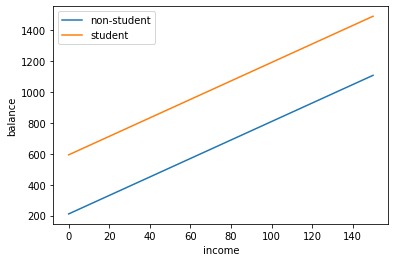

In [34]:
import numpy as np
import matplotlib.pyplot as plt

Xnew = np.array([[1, 0, 0], [1, 150, 0], [1, 0, 1], [1, 150, 1]])
preds = model.predict(Xnew)

plt.plot([0, 150], preds[:2], label = 'non-student')
plt.plot([0, 150], preds[2:], label = 'student')
plt.xlabel('income')
plt.ylabel('balance')
plt.legend()

I see that the 2 lines are parallel.  The balance for students and non students both increase at the same rate as income increases.  But what if that is not the case?  That is where an interaction term comes into use.

I am going to make an interaction term between student and income. 

In [35]:
df['Interaction'] = df['Student'] * df['Income']

In [36]:
X = df[['Income', 'Student', 'Interaction']]
Y = df['Balance']

# coefficient 
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           4.94e-28
Time:                        20:07:38   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         200.6232     33.698      5.953      0.000     134.373     266.873
Income          6.2182      0.592     10.502      0.000       5.054       7.382
Student       476.6758    104.351      4.568      0.000     271.524     681.827
Interaction    -1.9992      1.731     -1.155      0.249      -5.403       1.404
==============================================================================
Omnibus:                      107.788   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.158
Skew:                           0.228   Prob(JB):                     1.54e-05
Kurtosis:                       1.941   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

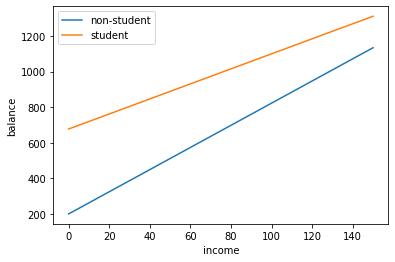

In [37]:
Xnew = np.array([[1, 0, 0, 0], [1, 150, 0, 0], [1, 0, 1, 0], [1, 150, 1, 150]])
preds = model.predict(Xnew)

plt.plot([0, 150], preds[:2], label = 'non-student')
plt.plot([0, 150], preds[2:], label = 'student')
plt.xlabel('income')
plt.ylabel('balance')
plt.legend()

Now we see that the the 2 lines have different slopes.  The slope for students is lower than the slope for non-students.  This suggestions that increases in income are associated with smaller increases in credit card balance among students as compared to non-students.  